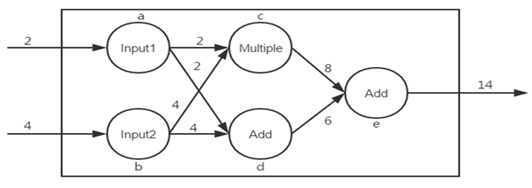

上图，数据流图由节点a, b, c, d, e 和相应的边组成，有两个输入和一个输出，其运算可通过以下代码实现：

In [5]:
a=2;
b=4
c=a*b; 
d=a+b
e=c+d
print(e)


14


如果要使用Graph，首先是创建Graph，然后用with语句，通知TensorFlow我们需要把一些op添加到指定的Graph中。如：

In [ ]:
import tensorflow as tf
#创建一个新的数据流图
graph=tf.Graph()
#使用with指定其后的一些op添加到这个Graph中
with graph.as_default():
    a=tf.add(2,4)
    b=tf.multiply(2,4)


如果有多个Graph时，建议不使用缺省的Graph或者为其分配一个句柄，否则容易导致混乱。一般采用如下方法：

In [ ]:
import tensorflow as tf

graph1=tf.Graph()
graph2=tf.Graph()  #或 graph2=tf.get_default_graph()

with graph1.as_default():
    #定义graph1的op、tensor等

with graph2.as_default():
    #定义graph1的op、tensor等


feed_dict参数可以用于覆盖图中的Tensor值，这需要一个python字典对象作为输入。字典的key是引用的Tensor对象，可以被覆盖，key可以是数字、字符串、列表以及Numpy 数组等。字典中的value必须是与key同类型（或者是可以转化为统一类型），示例如下

In [6]:
import tensorflow as tf

a=tf.add(2,4)
b=tf.multiply(a,5)

sess=tf.Session()
#定义一个字典，将a的值替换为100
dict={a:100}
sess.run(b,feed_dict=dict)  #返回值为500，而不是30
sess.close() #关闭session，以便释放资源

常量（constant）

In [7]:
import tensorflow as tf

#构建计算图
a=tf.constant(1.,name="a")
b=tf.constant(3.,shape=[2,2],name="b")

#创建会话
sess=tf.Session()

#执行会话
result_a=sess.run([a,b])
print("result_a:",result_a[0])
print("result_b:",result_a[1])


result_a: 1.0
result_b: [[ 3.  3.]
 [ 3.  3.]]


1、变量

如何创建、初始化、保存及恢复变量？以下我们通过一些实例来详细说明：

（1）创建模型的权重及偏置

In [8]:
import tensorflow as tf

weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35), name="weights")
biases = tf.Variable(tf.zeros([200]), name="biases")


（2）初始化变量

In [9]:
init_op = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init_op)


(3)保存模型变量

In [49]:
import os

if not os.path.exists('tmp/model'):
     %mkdir -p tmp/model


saver = tf.train.Saver()
saver.save(sess, './tmp/model/',global_step=100)


'./tmp/model/-100'

(4)恢复模型变量

In [50]:
#先加载 meta graph并恢复权重变量
saver = tf.train.import_meta_graph('./tmp/model/-100.meta')
saver.restore(sess,tf.train.latest_checkpoint('./tmp/model/'))


INFO:tensorflow:Restoring parameters from ./tmp/model/-100


(5)查看恢复后的变量

In [51]:
print(sess.run('biases:0'))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


2.共享模型变量

共享模型变量使用示例如下：

In [ ]:
#定义卷积神经网络运算规则，其中weights和biases为共享变量

def conv_relu(input, kernel_shape, bias_shape):
    # 创建变量"weights"
    weights = tf.get_variable("weights", kernel_shape, initializer=tf.random_normal_initializer())

    # 创建变量 "biases"
    biases = tf.get_variable("biases", bias_shape, initializer=tf.constant_initializer(0.0))
    conv = tf.nn.conv2d(input, weights, strides=[1, 1, 1, 1], padding='SAME')
    return tf.nn.relu(conv + biases)

#定义卷积层，conv1和conv2为变量命名空间
with tf.variable_scope("conv1"):
    # 创建变量 "conv1/weights", "conv1/biases".
    relu1 = conv_relu(input_images, [5, 5, 32, 32], [32])
with tf.variable_scope("conv2"):
    # 创建变量 "conv2/weights", "conv2/biases".
    relu1 = conv_relu(relu1, [5, 5, 32, 32], [32])


3.variables与get_variables的区别

使用tf.Variable时，如果检测到命名冲突，系统会自己处理。使用tf.get_variable()时，系统不会处理冲突，而会报错。

In [52]:
import tensorflow as tf
w_1 = tf.Variable(3,name="w_1")
w_2 = tf.Variable(1,name="w_1")
print( w_1.name)
print( w_2.name)


w_1:0
w_1_1:0


In [53]:
import tensorflow as tf

w_1 = tf.get_variable(name="w_1",initializer=1)
w_2 = tf.get_variable(name="w_1",initializer=2)


ValueError: Variable w_1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-53-4ad8806618f8>", line 3, in <module>
    w_1 = tf.get_variable(name="w_1",initializer=1)
  File "/home/wumg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/wumg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):


tf.get_variabl创建变量时，会进行变量检查，当设置为共享变量时（通过scope.reuse_variables()或tf.get_variable_scope().reuse_variables()），检查到第二个拥有相同名字的变量，就返回已创建的相同的变量；如果没有设置共享变量，则会报[ValueError: Variable varx alreadly exists, disallowed.]错误。而tf.Variable()创建变量时，name属性值允许重复，检查到相同名字的变量时，将使用自动别名机制创建不同的变量

In [54]:
import tensorflow as tf

tf.reset_default_graph()

with tf.variable_scope("scope1"):
    w1 = tf.get_variable("w1", shape=[])
    w2 = tf.Variable(0.0, name="w2")
with tf.variable_scope("scope1", reuse=True):
    w1_p = tf.get_variable("w1", shape=[])
    w2_p = tf.Variable(1.0, name="w2")

print(w1 is w1_p, w2 is w2_p)
print(w1_p,w2_p)


True False
<tf.Variable 'scope1/w1:0' shape=() dtype=float32_ref> <tf.Variable 'scope1_1/w2:0' shape=() dtype=float32_ref>


4、占位符

In [56]:
import numpy as np

x = tf.placeholder(tf.float32, shape=(2, 3))
y=tf.reshape(x,[3,2])
z= tf.matmul(x, y)
print(z)

with tf.Session() as sess:
  #print(sess.run(y))  #不注释将报错，因没有给y输入具体数据.
  rand_array_x = np.random.rand(2, 3)
  rand_array_y = np.random.rand(3, 2)
  print(sess.run(z, feed_dict={x: rand_array_x,y: rand_array_y}))  #这句成功


Tensor("MatMul_1:0", shape=(2, 2), dtype=float32)
[[ 0.92954463  0.74770784]
 [ 0.64772862  0.81806672]]


5、实例：比较constant 、variable和 placeholder

1）利用constant表示输入

In [57]:
import tensorflow as tf

a=tf.constant(5,name="input_a")
b=tf.constant(3,name="input_b")
c=tf.multiply(a,b,name="mul_c")
d=tf.add(a,b,name="add_d")
e=tf.add(c,d,name="add_e")
sess=tf.Session()
#with tf.Session() as sess:
output=sess.run(e)   ##输出结果为23
print("输出结果:", output)

writer=tf.summary.FileWriter('home/feigu/tmp',sess.graph)
writer.close()
sess.close()


输出结果: 23


2）使用variable表示输入

In [58]:
import tensorflow as tf

a=tf.Variable(5,name="input_a")
b=tf.Variable(3,name="input_b")
c=tf.multiply(a,b,name="mul_c")
d=tf.add(a,b,name="add_d")
e=tf.add(c,d,name="add_e")
init=tf.global_variables_initializer()
sess=tf.Session()
#with tf.Session() as sess:
#init variable 
sess.run(init)
output=sess.run(e)   ##输出结果为23
print("输出结果:", output)


输出结果: 23


3）输入用向量表示

In [59]:
import tensorflow as tf

a=tf.Variable([3,5],name="input_a")
#b=tf.Variable(3,name="input_b")
c=tf.reduce_prod(a,name="mul_c")
d=tf.reduce_sum(a,name="add_d")
e=tf.reduce_sum([c,d],name="add_e")
init=tf.global_variables_initializer()
sess=tf.Session()
#with tf.Session() as sess:
#init variable 
sess.run(init)
output=sess.run(e)   ##输出结果为23
print("输出结果:", output)

writer=tf.summary.FileWriter('home/feigu/tmp',sess.graph)
writer.close()
sess.close()


输出结果: 23


4）用placeholder表示输入

In [60]:
import tensorflow as tf

a=tf.placeholder(tf.int8,shape=[None],name="input_a")
#b=tf.Variable(3,name="input_b")
c=tf.reduce_prod(a,name="mul_c")
d=tf.reduce_sum(a,name="add_d")
e=tf.reduce_sum([c,d],name="add_e")
init=tf.global_variables_initializer()
sess=tf.Session()
#with tf.Session() as sess:
#init variable 
#sess.run(init)
output=sess.run(e,feed_dict={a:[3,5]})   ##输出结果为23
print("输出结果:", output)

writer=tf.summary.FileWriter('home/feigu/tmp',sess.graph)
writer.close()
sess.close()


输出结果: 23


TensorFlow实现数据流图

In [62]:
#引入TensorFlow
import tensorflow as tf
#定义算子
a=tf.constant(2)
b=tf.constant(4)
c=tf.multiply(a,b)
d=tf.add(a,b)
e=tf.add(c,d)
#定义会话
sess=tf.Session()
#会话调用运算
output=sess.run(e)
#打印运算结果
print(output)
#关闭会话
sess.close()


14


可视化数据流图

In [65]:
#引入TensorFlow
import tensorflow as tf
#定义算子及算子名称
a=tf.constant(2,name="input_a")
b=tf.constant(4,name="input_b")
c=tf.multiply(a,b,name="mul_c")
d=tf.add(a,b,name="add_d")
e=tf.add(c,d,name="add_e")
sess=tf.Session()
output=sess.run(e)
print(output)
#将数据流图写入log文件
writer=tf.summary.FileWriter('./tmp1',sess.graph)
writer.close()
sess.close()


14


现实中的模型运算会更复杂，需要对图中的运算进行封装来获得更好的可视化， TensorFlow采用作用域(name space) 来组织运算的封装

In [66]:
import tensorflow as tf
graph=tf.Graph()
with graph.as_default():
    in_1=tf.placeholder(tf.float32, shape=[], name="input_a")
    in_2=tf.placeholder(tf.float32, shape=[], name="input_b")
    const=tf.constant(3, dtype=tf.float32, name="static_value")
    with tf.name_scope("Transformation"):
        with tf.name_scope("A"):
            A_mul=tf.multiply(in_1, const)
            A_out=tf.subtract(A_mul, in_1)
        with tf.name_scope("B"):
            B_mul=tf.multiply(in_2, const)
            B_out=tf.subtract(B_mul, in_2)
        with tf.name_scope("C"):
            C_div=tf.div(A_out, B_out)
            C_out=tf.add(C_div, const)
        with tf.name_scope("D"):
            D_div=tf.div(B_out, A_out)
            D_out=tf.add(D_div, const)
            out=tf.maximum(C_out, D_out)
writer=tf.summary.FileWriter('home/feigu/tmp', graph=graph)
writer.close()


TensorFlow分布式

In [67]:
#这里单机有CPU及两个GPU卡：
#一般把参数存储及简单操作定义在CPU上，比较复杂操作定义在各自的GPU上。
import tensorflow as tf
import numpy as np

#生成输入数据
N_GPU=2
train_X = np.random.rand(100).astype(np.float32)
train_Y = train_X * 0.2 + 0.3
#参数存储及简单操作放在CPU上。
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)
    w = tf.Variable(0.0, name="weight")
    b = tf.Variable(0.0, name="reminder")    
#优化操作放在GPU上操作,采用异步更新参数
     #因只有两个GPU卡，所以只循环2次
    for i in range(2):
        with tf.device('/gpu:%d' %i): 
            y = w * X + b
            loss = tf.reduce_mean(tf.square(y - Y))
            init_op = tf.global_variables_initializer() 
            train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
# 创建会话，训练模型
    with tf.Session() as sess:
        #初始化参数
        sess.run(init_op)
        for i in range(1000):
            sess.run(train_op, feed_dict={X: train_Y, Y: train_Y})

            if i % 100 == 0:
                print( i, sess.run(w), sess.run(b))

        print(sess.run(w))
        print(sess.run(b))


0 0.00329668 0.0080343
100 0.131829 0.312309
200 0.148664 0.339445
300 0.15483 0.340191
400 0.159953 0.338435
500 0.16495 0.336451
600 0.169909 0.334456
700 0.174836 0.332471
800 0.179735 0.330497
900 0.184604 0.328535
0.189397
0.326604
